#### Here we transform the NetCDF file into standard lists for further analyses 
#### We regrid the spatial resolution onto "0.5°×0.5° for GeoMapping"
#### Historical O${_3}$ simulations 1850-2014 (selecting 2010-2014 for quick observation)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import iris

#### Prescribe the key parameters: 
##### i) target years for analysis (e.g. Y = 5 for five most recent years 2010-2014)
##### ii) ideal spatial resolutions (e.g. 180×90 grids)
###### These parameters are prescribed arbitrarily

In [2]:
Y = 5
lon = 720
lat = 360

#### Define the 0.5°×0.5° new spatial resolution for regridding (centred coordinates)

In [3]:
res_lon = 360/lon
res_lat = 180/lat
sample_points = [('longitude', np.linspace(0+res_lon/2, 360-res_lon/2, lon)),
                 ('latitude',  np.linspace(-90+res_lat/2, 90-res_lat/2, lat))]

In [4]:
sample_points

[('longitude',
  array([2.5000e-01, 7.5000e-01, 1.2500e+00, 1.7500e+00, 2.2500e+00,
         2.7500e+00, 3.2500e+00, 3.7500e+00, 4.2500e+00, 4.7500e+00,
         5.2500e+00, 5.7500e+00, 6.2500e+00, 6.7500e+00, 7.2500e+00,
         7.7500e+00, 8.2500e+00, 8.7500e+00, 9.2500e+00, 9.7500e+00,
         1.0250e+01, 1.0750e+01, 1.1250e+01, 1.1750e+01, 1.2250e+01,
         1.2750e+01, 1.3250e+01, 1.3750e+01, 1.4250e+01, 1.4750e+01,
         1.5250e+01, 1.5750e+01, 1.6250e+01, 1.6750e+01, 1.7250e+01,
         1.7750e+01, 1.8250e+01, 1.8750e+01, 1.9250e+01, 1.9750e+01,
         2.0250e+01, 2.0750e+01, 2.1250e+01, 2.1750e+01, 2.2250e+01,
         2.2750e+01, 2.3250e+01, 2.3750e+01, 2.4250e+01, 2.4750e+01,
         2.5250e+01, 2.5750e+01, 2.6250e+01, 2.6750e+01, 2.7250e+01,
         2.7750e+01, 2.8250e+01, 2.8750e+01, 2.9250e+01, 2.9750e+01,
         3.0250e+01, 3.0750e+01, 3.1250e+01, 3.1750e+01, 3.2250e+01,
         3.2750e+01, 3.3250e+01, 3.3750e+01, 3.4250e+01, 3.4750e+01,
         3.5250e+01

#### Define the longitude-latitude-temporal sequence list

In [5]:
t = Y*12 ## Y years correspond to 12Y months 

lon_range = np.linspace(0+res_lon/2, 360-res_lon/2, lon)
lat_range = np.linspace(-90+res_lat/2, 90-res_lat/2, lat) 
t_range   = np.linspace(1, t, t) 
lat_mesh, t_mesh, lon_mesh = np.meshgrid(lat_range, t_range, lon_range) 

t_grid   = t_mesh.reshape(t*lon*lat, 1)
lon_grid = lon_mesh.reshape(t*lon*lat, 1)
lat_grid = lat_mesh.reshape(t*lon*lat, 1)

dataset = pd.DataFrame(lon_grid, columns = ["longitude"])
dataset['latitude'] = lat_grid
dataset['t'] = t_grid
dataset['loc'] = dataset['longitude']*10000+dataset['latitude']
dataset

,longitude,latitude,t,loc
0,0.25,-89.75,1.0,2410.25
1,0.75,-89.75,1.0,7410.25
2,1.25,-89.75,1.0,12410.25
3,1.75,-89.75,1.0,17410.25
4,2.25,-89.75,1.0,22410.25
...,...,...,...,...
15551995,357.75,89.75,60.0,3577589.75
15551996,358.25,89.75,60.0,3582589.75
15551997,358.75,89.75,60.0,3587589.75
15551998,359.25,89.75,60.0,3592589.75


#### Import surface/ambient O${_3}$

In [6]:
data = iris.load_cube('D://Research/CMIP6/MOHC/historical/o3_AERmon_UKESM1-0-LL_historical_r1i1p1f2_gn_200001-201412.nc', 'o3')
time_seq, layer, latitude, longitude = data.shape
data = data[time_seq-t:time_seq,0,:,:]
data = data.interpolate(sample_points, iris.analysis.Linear())
values = np.array(data.data)
o3 = values.reshape(t*lon*lat,1)
dataset['o3'] = o3

#### We should convert 0-360° into 180°W-180°E scheme

In [7]:
dataset_pt1 = dataset[dataset['longitude'] < 180]
dataset_pt2 = dataset[dataset['longitude'] >= 180]
dataset_pt2['longitude'] = dataset_pt2['longitude']-360
dataset_adj = pd.concat([dataset_pt1, dataset_pt2], ignore_index=True)
dataset_adj

,longitude,latitude,t,loc,o3
0,0.25,-89.75,1.0,2410.25,1.635586e-08
1,0.75,-89.75,1.0,7410.25,1.635585e-08
2,1.25,-89.75,1.0,12410.25,1.635599e-08
3,1.75,-89.75,1.0,17410.25,1.635621e-08
4,2.25,-89.75,1.0,22410.25,1.635642e-08
...,...,...,...,...,...
15551995,-2.25,89.75,60.0,3577589.75,1.621541e-08
15551996,-1.75,89.75,60.0,3582589.75,1.621581e-08
15551997,-1.25,89.75,60.0,3587589.75,1.621621e-08
15551998,-0.75,89.75,60.0,3592589.75,1.621423e-08


In [8]:
dataset_adj['month'] = dataset_adj['t']%12

annual_average = dataset_adj.groupby(['loc']).mean()

dataset_JJA = dataset_adj[dataset_adj['month']>5]
dataset_JJA = dataset_JJA[dataset_JJA['month']<9]

dataset_DJF = dataset_adj[dataset_adj['month']<2]

JJA_average = dataset_JJA.groupby(['loc']).mean()
DJF_average = dataset_DJF.groupby(['loc']).mean()

### Map the variables to ensure correct gridding

(-90.0, 90.0)

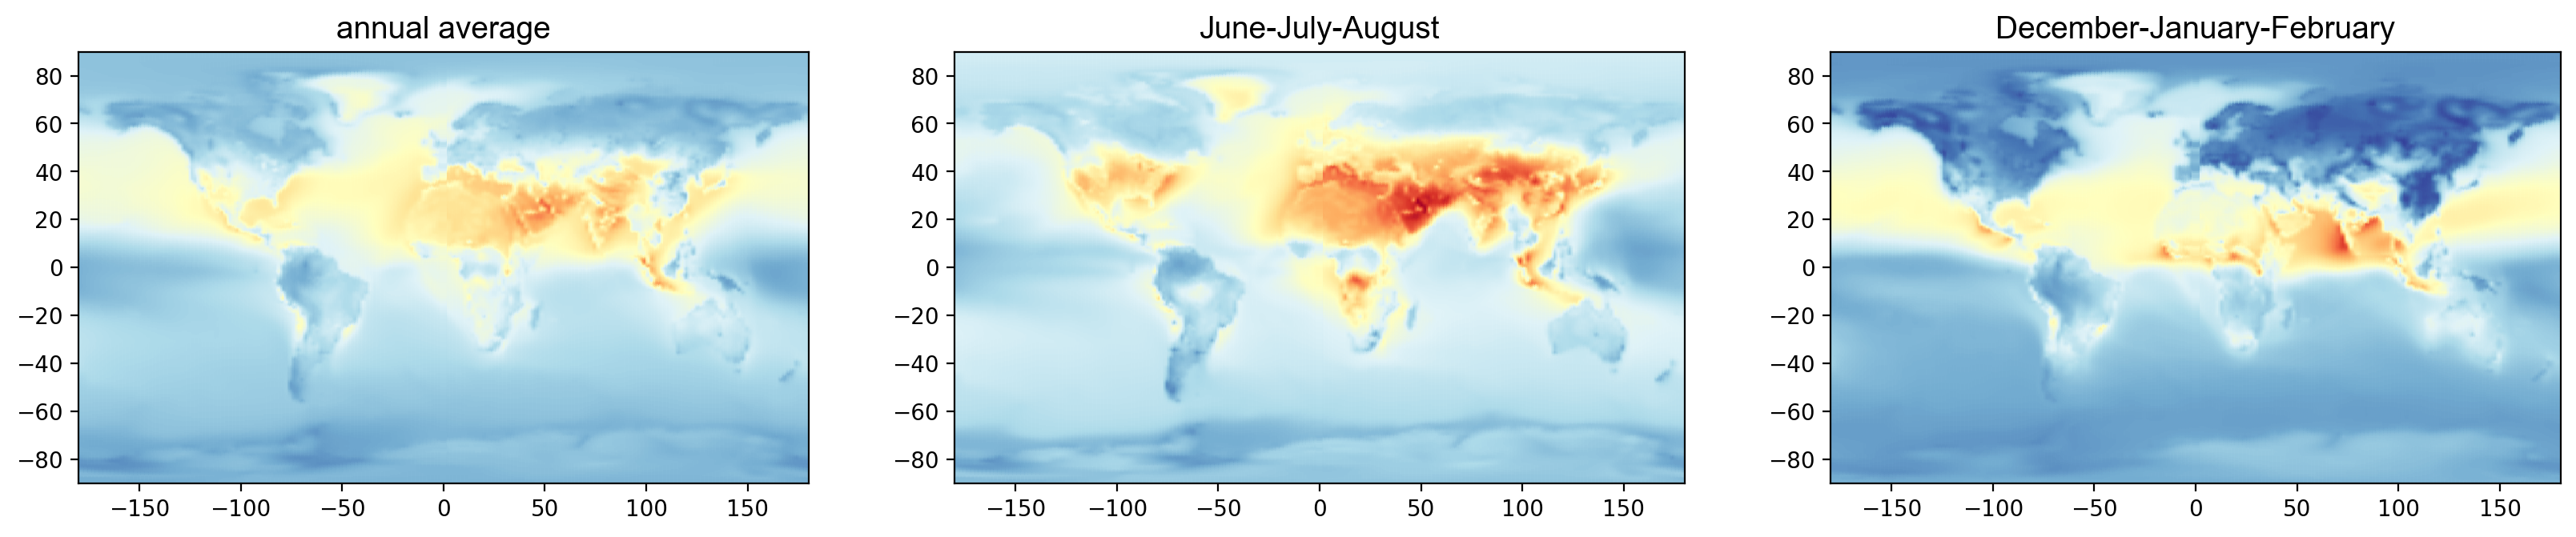

In [9]:
plt.figure(num=None, figsize=(20, 3.5), dpi=200, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('RdYlBu_r')
x = annual_average['longitude']
y = annual_average['latitude']

plt.subplot(1,3,1)
plt.title('annual average', fontsize = 14, fontname = "Arial", color = "black")
z = annual_average['o3']*10**9
sc = plt.scatter(x, y, c=z, marker="s", s=5, vmin=0, vmax=80, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
#plt.colorbar(fraction=0.02)

plt.subplot(1,3,2)
plt.title('June-July-August', fontsize = 14, fontname = "Arial", color = "black")
z = JJA_average['o3']*10**9
sc = plt.scatter(x, y, c=z, marker="s", s=5, vmin=0, vmax=80, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
#plt.colorbar(fraction=0.02)

plt.subplot(1,3,3)
plt.title('December-January-February', fontsize = 14, fontname = "Arial", color = "black")
z = DJF_average['o3']*10**9
sc = plt.scatter(x, y, c=z, marker="s", s=5, vmin=0, vmax=80, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
#plt.colorbar(fraction=0.02)

### Merge and export the dataset for geomapping 

In [10]:
coord = annual_average[['longitude','latitude']]
coord['annual'] = annual_average['o3']*10**9
coord['JJA'] = JJA_average['o3']*10**9
coord['DJF'] = DJF_average['o3']*10**9

coord.to_csv('Extended Data Fig. 1 high-res-ozone-concentration-mapping.csv', index=False)